In [1]:
from library.analysis import loadDataset, testSets
from library.exercise import plotCloud
from library.generators.XConvGeN import XConvGeN, GeneratorConfig
from library.timing import timing
from fdc.fdc import FDC
import numpy as np
import tensorflow as tf

In [2]:
data = loadDataset(testSets[0])

Load 'folding_abalone_17_vs_7_8_9_10'
from pickle file
Data loaded.


In [3]:
print((len(data.data), len(data.data0), len(data.data1)))

(2338, 2280, 58)


In [4]:
fdc = FDC()
fdc.nom_list = [0]
fdc.cont_list = list(range(data.data0.shape[1]))[1:]

In [5]:
config = GeneratorConfig(n_feat=data.data0.shape[1], neb=5, genAddNoise=True)
gen = XConvGeN(config=config, fdc=fdc, debug=True)

In [6]:
gen.reset(data.data)

neb=5, gen=5
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 5, 8)]       0           []                               
                                                                                                  
 UnsharpenInput (Conv1D)        (None, 3, 8)         200         ['input_1[0][0]']                
                                                                                                  
 InputMatrixToVector (Flatten)  (None, 24)           0           ['UnsharpenInput[0][0]']         
                                                                                                  
 P5_dense (Dense)               (None, 25)           625         ['InputMatrixToVector[0][0]']    
                                                                                 

__________________________________________________________________________________________________
None




FDC.normalize (init): 0.00003 / 0.000s
FDC.normalize (clustering CONT): 9.62090 / 9.621s
FDC.normalize (clustering ORD): 0.00008 / 9.621s
FDC.normalize (clustering NOM): 23.54596 / 33.167s
FDC.normalize (concat): 0.00037 / 33.167s
FDC.normalize (total): 0.00004 / 33.167s


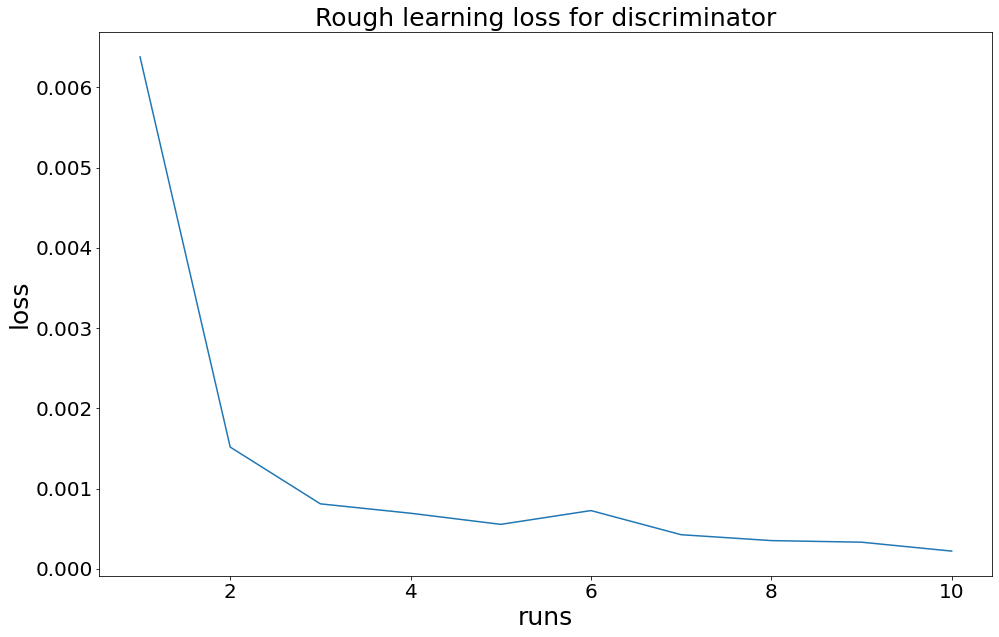

train: #1 1825.6522s


In [7]:
t = timing("train")
t.start()
gen.train(data.data)
t.stop()
print(t)

# train: #1 225.9655s

In [8]:
syntheticPoints = gen.generateData(data.data1.shape[0])

In [9]:
syntheticPoints[:5]

array([[ 2.        , -0.23413281,  0.47051322,  1.1955764 ,  1.1264731 ,
         0.4334687 ,  0.33978248,  1.3558861 ],
       [ 2.        ,  1.1309009 ,  1.6688478 , -0.23728171,  1.646968  ,
        -1.1485367 , -0.11681557, -1.2956882 ],
       [ 2.        ,  0.581618  , -0.35910988, -0.1333292 , -0.69408363,
         0.05146363, -0.5657996 , -2.1522822 ],
       [ 2.        ,  0.14485037,  1.0314367 , -0.9701484 ,  0.11441422,
        -0.34367567,  1.1857525 , -0.45503154],
       [ 2.        ,  0.42292345,  0.4547682 ,  0.63876075, -1.2104864 ,
        -0.01673755,  2.7918315 ,  0.3359083 ]], dtype=float32)

In [10]:
data.data1[:5]

array([[2.    , 0.565 , 0.425 , 0.16  , 0.9425, 0.3495, 0.2185, 0.275 ],
       [0.    , 0.495 , 0.4   , 0.155 , 0.6445, 0.242 , 0.1325, 0.205 ],
       [2.    , 0.54  , 0.435 , 0.18  , 0.996 , 0.3835, 0.226 , 0.325 ],
       [0.    , 0.69  , 0.56  , 0.215 , 1.719 , 0.68  , 0.299 , 0.47  ],
       [0.    , 0.68  , 0.55  , 0.21  , 1.7445, 0.5975, 0.305 , 0.625 ]])

In [11]:
import math
dists = [min([math.sqrt(sum(y*y)) for y in (data.data1 - p) ]) for p in syntheticPoints]
print( min(dists), sum(dists) / len(dists), max(dists) )

1.0661173288071848 2.475583521644324 4.164965359477582


In [12]:
v = gen.predictReal(data.data1)
(min(v), max(v), sum(v) / len(v))

(4.1701467e-05, 0.24636638, 0.007259784416889708)

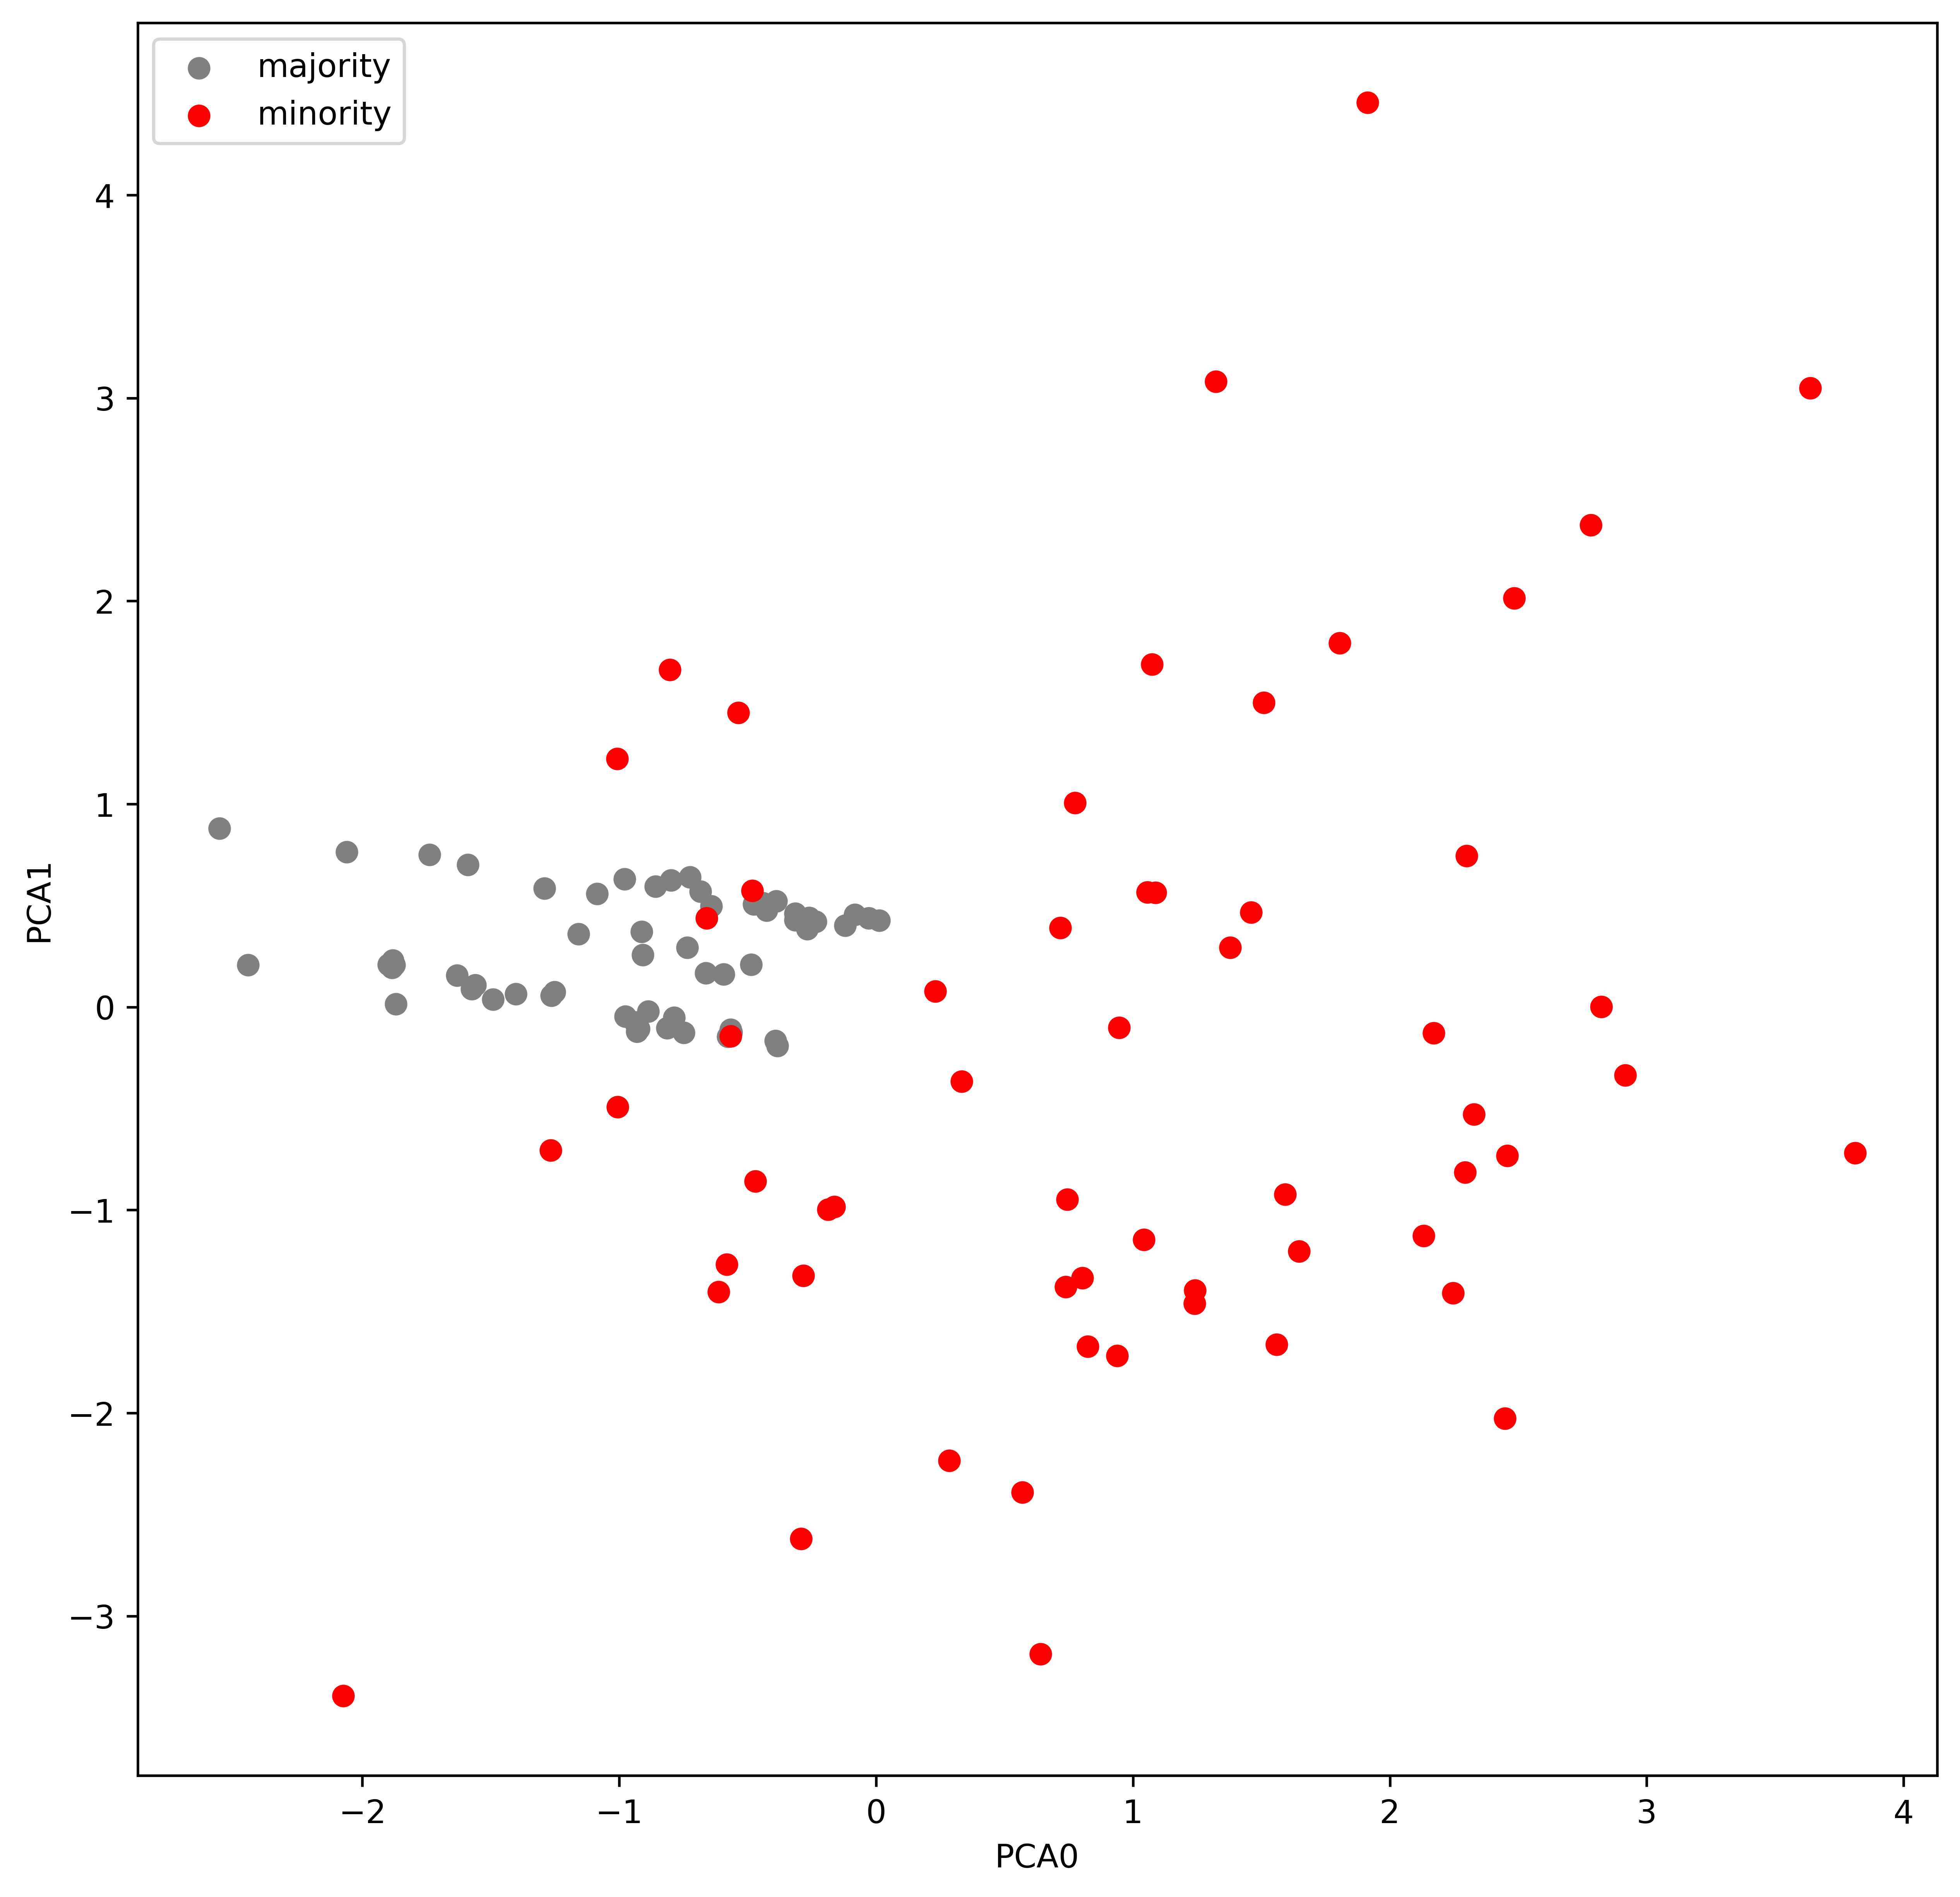

In [13]:
plotCloud(data.data1, syntheticPoints)